In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (3,3)) #define the image size

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [2]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomAffine(degrees=40, scale=(.9, 1.1), shear=0),
    transforms.RandomPerspective(distortion_scale=0.2),
    transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5, ))])


trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform)
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transform)

In [3]:
#loading the training data from trainset
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
#loading the test data from testset
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [4]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
def imshow(img):
    npimg = img.numpy() #convert the tensor to numpy for displaying the image
    #for displaying the image, shape of the image should be height * width * channels 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

In [5]:
print(len(trainset.data))
print(len(trainset.targets))

60000
60000


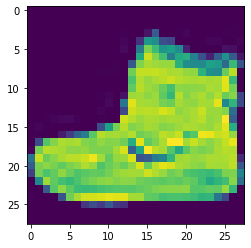

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tensor(9)
Ankle boot
784 28


In [6]:
# imshow(trainset.data.[0])
itemNumber=0
npimg=trainset.data[itemNumber].numpy()
plt.imshow(npimg)
plt.show()
print(trainset.classes)
print(trainset.targets[itemNumber])
print(trainset.classes[trainset.targets[itemNumber].item()])
print(npimg.size,len(npimg))

In [7]:
# Create NN
# REF: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120) #16 * 5 * 5 -> 1024
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.d1 = nn.Dropout(0.2)

    def forward(self, x):
#         print(x.size())
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.size())
        x = x.view(-1, 256) # 16 * 5 * 5 -> 1024
#         print(x.size())
        x = F.relu(self.fc1(x))
#         print(x.size())
        x = F.relu(self.fc2(x))
        x = self.d1(x)
#         print(x.size())
        x = self.fc3(x)
#         print(x.size())
        return x


net = Net()




In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

[1,  2000] loss: 1.162
[1,  4000] loss: 0.834
[1,  6000] loss: 0.779
[1,  8000] loss: 0.721
[1, 10000] loss: 0.712
[1, 12000] loss: 0.650
[1, 14000] loss: 0.654
[2,  2000] loss: 0.625
[2,  4000] loss: 0.612
[2,  6000] loss: 0.626
[2,  8000] loss: 0.602
[2, 10000] loss: 0.607
[2, 12000] loss: 0.564
[2, 14000] loss: 0.609
[3,  2000] loss: 0.574
[3,  4000] loss: 0.562
[3,  6000] loss: 0.558
[3,  8000] loss: 0.564
[3, 10000] loss: 0.566
[3, 12000] loss: 0.551
[3, 14000] loss: 0.549
[4,  2000] loss: 0.521
[4,  4000] loss: 0.540
[4,  6000] loss: 0.539
[4,  8000] loss: 0.548
[4, 10000] loss: 0.540
[4, 12000] loss: 0.537
[4, 14000] loss: 0.526
[5,  2000] loss: 0.516
[5,  4000] loss: 0.530
[5,  6000] loss: 0.527
[5,  8000] loss: 0.518
[5, 10000] loss: 0.523
[5, 12000] loss: 0.531
[5, 14000] loss: 0.518
[6,  2000] loss: 0.498
[6,  4000] loss: 0.514
[6,  6000] loss: 0.520
[6,  8000] loss: 0.514
[6, 10000] loss: 0.514
[6, 12000] loss: 0.528
[6, 14000] loss: 0.503
[7,  2000] loss: 0.514
[7,  4000] 

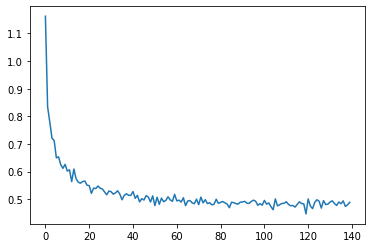

In [10]:
loss_hist=[]
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         print(inputs,labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            loss_hist.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')
plt.plot(loss_hist)

In [11]:
import random
x = random.random()
y=str(x)[3:10]

In [12]:

PATH = f'./fashionmnist_net_adam_{y}.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


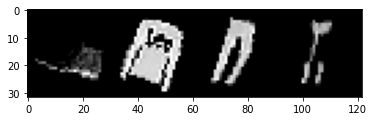

GroundTruth:  Ankle Boot Pullover Trouser Trouser


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
net = Net()
# PATH = './fashionmnist_net_adam.pth'
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Ankle Boot Pullover Trouser Trouser


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-Shirt : 78 %
Accuracy of Trouser : 94 %
Accuracy of Pullover : 73 %
Accuracy of Dress : 78 %
Accuracy of  Coat : 63 %
Accuracy of Sandal : 86 %
Accuracy of Shirt : 45 %
Accuracy of Sneaker : 92 %
Accuracy of   Bag : 93 %
Accuracy of Ankle Boot : 92 %
